# HTTP

La idea es comunicarse con un servidor mediante el protocolo HTTP y recuperar información (una página web o similar).
Para ello, conviene conocer el protocolo HTTP para saber de qué manera dirigir la petición al servidor. He aquí un ejemplo sencillo. Se conecta
con el servidor:

In [20]:
import http.client
conn=http.client.HTTPConnection('www.google.es')

Se utiliza uno de los métodos HTTP para buscar los datos deseados:


In [21]:
conn.request("GET","/search?hl=es&q=python")

Se recupera la respuesta del servidor:

In [22]:
response=conn.getresponse()

Se verifica que todo se desarrolla correctamente, para lo cual hay que conocer los códigos de respuesta HTTP, que están perfectamente
explicados en la documentación oficial: http://docs.python.org/py3k/library/http.client.html


In [23]:
print(response.status,response.reason)

200 OK


Como todo se ha desarrollado correctamente, basta con recuperar la página HTML devuelta por el servidor:


In [24]:
html=response.read()

Veamos a qué puede parecerse:

b'<!doctype html><html lang="es"><head><meta charset="UTF-8"><meta content="AsaRqi654cyRriPH1kD9f2yjw+qprPD0tubd0nDFVO5r8d2ME0kET0bPlTRAuG2XwdNt5p0JubwHrfpe43VrEgAAAABueyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5lczo0NDMiLCJmZWF0dXJlIjoiTG9uZ0FuaW1hdGlvbkZyYW1lVGltaW5nIiwiZXhwaXJ5IjoxNzA5NjgzMTk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python - Buscar con Google</title><script nonce="VULJOFGxQyloY3gzSlkNTg">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).c
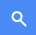
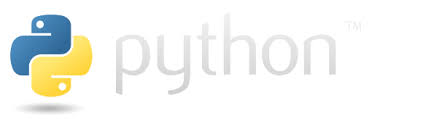
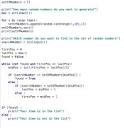
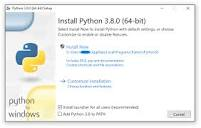

In [26]:
len(html)
print(html)

Basta, ahora, con procesar el HTML para extraer los datos que se desee, lo cual puede llevarse a cabo fácilmente mediante un parser como
BeautifulSoup, con un poco de búsqueda para comprender la estructura de la página y poder, así, extraer la información válida.

Evidentemente, un uso de este estilo resulta arcaico cuando se dispone de servicios web, pero en ocasiones no hay otra manera de trabajar
(por ejemplo, en un sitio viejo o un sitio de pago).

La escritura de estos scripts requiere atención para desvelar cualquier cambio en la estructura de la página, que podría poner en peligro una
correcta lectura de los datos. De este modo, resulta importante, en función de las necesidades, guardar copias de seguridad de las páginas
completas para realizar una posterior corrección.

La documentación oficial ofrece un ejemplo que permite simular el POST de un formulario.
En la primera parte, crearemos una aplicación de consola que permita introducir los datos de una aplicación web mediante la emisión de
consultas POST.

Un servidor HTTP es un servidor TCP que utiliza el protocolo HTTP. Tal y como hemos visto antes, Python ofrece herramientas específicas para
gestionar fácilmente las capas bajas del procesamiento y de los intercambios de red. De este modo, provee dos clases en la línea de TCP:



In [4]:
import http.server
type.mro(http.server.HTTPServer)
#type.mro(http.server.BaseHTTPRequestHandler)

[http.server.HTTPServer,
 socketserver.TCPServer,
 socketserver.BaseServer,
 object]

Esto permite crear rápidamente un pequeño servidor para devolver el contenido por http. Para ello, el diseñador debe describir el
comportamiento esperado del servidor cuando recibe una consulta, implementado una subclase de BaseHTTP-RequestHandler.

Existen, no obstante, algunas diferencias entre TPC y HTTP en el procesamiento de la consulta, pues la clase efectúa un primer trabajo para
recuperar el método utilizado por el cliente y abstrae una parte significativa vinculada al protocolo HTTP.

Por ello, no es preciso sobrecargar un método handle, sino sobrecargar un método por método HTTP según la regla de nomenclatura
siguiente: do_METHOD.

In [4]:
#!/usr/bin/python3
from http.server import BaseHTTPRequestHandler,HTTPServer
params='',8083
class   HelloHandler(BaseHTTPRequestHandler):
    def do_HEAD(self):
        self.send_response(200)
        self.send_header('Content-type','text/html')
        self.end_headers()
    def do_GET(self):
        self.do_HEAD()
        self.wfile.write("""<html><head><title>Hello
            World</title></head><body><p>HelloWorld</p>
            <form method="POST" >
            <input type="submit" value="Click me" />
            </form>
            </body></html>""".encode("utf-8"))
    def do_POST(self):
        self.do_HEAD()
        self.wfile.write("""<html><head><title>Hello
            World</title></head><body><p>Form received</p>
            </body></html>""".encode("utf-8"))
#server=server_class(params,HelloHandler)
server=HTTPServer(params,HelloHandler)

try:
    server.serve_forever()
except KeyboardInterrupt:
    pass
server.server_close()

127.0.0.1 - - [30/Jan/2024 08:48:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:48:04] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:48:28] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:48:31] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:49:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:49:15] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:49:37] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:49:39] "GET /favicon.ico HTTP/1.1" 200 -


Una vez lanzado el servidor por línea de comandos, solo queda probar el resultado:

In [38]:
import http.client
conn=http.client.HTTPConnection('192.168.1.123',8080)
conn.request('GET','/')
response =conn.getresponse()
print(response.status,response.reason)
response.read()

404 File not found


b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN"\n        "http://www.w3.org/TR/html4/strict.dtd">\n<html>\n    <head>\n        <meta http-equiv="Content-Type" content="text/html;charset=utf-8">\n        <title>Error response</title>\n    </head>\n    <body>\n        <h1>Error response</h1>\n        <p>Error code: 404</p>\n        <p>Message: File not found.</p>\n        <p>Error code explanation: HTTPStatus.NOT_FOUND - Nothing matches the given URI.</p>\n    </body>\n</html>\n'

Con un POST, se obtendría exactamente el mismo resultado, pues ambos métodos son idénticos. Por el contrario, con un DELETE, no declarado:

In [ ]:
conn.request('DELETE','/url/de/test?a=42&b=si')
response =conn.getresponse()
response.status,response.reason

Cabe destacar que el servidor escribe en la consola lo que se pasa cuando se solicita:

localhost-"GET/url/de/test?a=42&b=siHTTP/1.1" 200-

localhost-"POST/url/de/test?a=42&b=siHTTP/1.1" 200-

localhost-code501,messageUnsupportedmethod(’DELETE’)

localhost-"DELETE/url/de/test?a=42&b=siHTTP/1.1"501-

Ahora que hemos visto cómo gestionar del lado del servidor el envío de datos, abordaremos la forma de procesar aquellos que se envían desde el cliente y los datos del entorno.

Por un lado, cierta información está presente directamente en los atributos de las clases; por otro lado, nos apoyaremos en librerías externas para obtener cierta información, como por ejemplo urllib:

In [5]:
#!/usr/bin/python3
from http.server import BaseHTTPRequestHandler,HTTPServer
from urllib.parse import urlparse
params='',8032
class HelloHandler(BaseHTTPRequestHandler):
    def do_GET(self):
        self.send_response(200)
        self.send_header(b'Content-type',b'text/html')
        self.end_headers()
        infos=[]
        infos.append('client_adress:%s'%str(self.client_address))
        infos.append('address_string:%s'%self.address_string())
        infos.append('command:%s'%self.command)
        infos.append('unparsedpath:%s'%self.path)
        parsed=urlparse(self.path)
        infos.append('parsedpath%s'%parsed.path)
        infos.append('query:%s'%parsed.query)
        infos.append('request_version:%s'% self.request_version)
        infos.append('server_version:%s'%self.server_version)
        infos.append('sys_version:%s'%self.sys_version)
        infos.append('protocol_version:%s'%self.protocol_version)
        for k,v in self.headers.items():
            infos.append('HEADER%s:%s'%(k,v.strip()))
        infos=b'<ul><li>'+b'</li><li>'.join([bytes(i,'utf-8')for i in infos])+b'</li></ul>'
        self.wfile.write(b"""<html><head><title>Hello World</title></head><body><p>HelloWorld</p>"""+infos+b"""</body></html>""")
    
        return

server=HTTPServer(params,HelloHandler)
server.serve_forever()

127.0.0.1 - - [30/Jan/2024 08:51:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:51:36] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:09] "GET /loquesea HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:10] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:21] "GET /loquesea HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:22] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:24] "GET /loquesea HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:24] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:25] "GET /loquesea HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:25] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:26] "GET /loquesea HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:26] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:27] "GET /loquesea HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:28] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2024 08:52:31

Basta con repetir la prueba creando un cliente en una consola Python:

In [ ]:
conn=http.client.HTTPConnection('127.0.0.1',8016)
conn.request('GET','/url/de/test?a=42&b=si')
response =conn.getresponse()
response.status,response.reason
(200,'OK')
response.read()

Y formatear el resultado, para obtener:

client_adress: (’127.0.0.1’, 34522)
address_string: localhost
command: GET
unparsed path: /url/de/test?a=42&b=si
parsed path /url/de/test
query: a=42&b=si
request_version: HTTP/1.1
server_version: BaseHTTP/0.6
sys_version: Python/3.2
protocol_version: HTTP/1.0
HEADER Host: 127.0.0.1:8016
HEADER Accept-Encoding: identity

A partir de este momento, hay que ver cómo explotar las URL (http://docs.python.org/py3k/library/urllib.parse.html?
highlight=urlparse#urllib.parse.urlparse) y, si es preciso, las cookies (http://docs.python.org/py3k/library/http.cookies.html). Cabe destacar que existen dos implementaciones particulares, y ambas permiten servir el árbol de archivos disponibles a partir de la raíz de la aplicación.

La primera trabaja directamente, la otra utiliza CGI:

In [3]:
import http.server
type.mro(http.server.SimpleHTTPRequestHandler)
type.mro(http.server.CGIHTTPRequestHandler)

[http.server.CGIHTTPRequestHandler,
 http.server.SimpleHTTPRequestHandler,
 http.server.BaseHTTPRequestHandler,
 socketserver.StreamRequestHandler,
 socketserver.BaseRequestHandler,
 object]

Cabe destacar que es posible obtener el árbol de archivos simplemente consultando la carpeta deseada en la consola y escribiendo:

python -m http.server8000


# Proxy

Un requisito habitual es poder acceder a un recurso que se encuentra tras un proxy. Los sistemas operativos modernos permiten configurar este proxy directamente en el sistema operativo y las aplicaciones saben cómo buscar la información y configurarse solas. Python sabe hacer esto.

Por el contrario, cuando no se configura el sistema, no se puede configurar o se desea utilizar un proxy alternativo para un script, entonces es necesario configurar la aplicación de una manera particular. Python no es una excepción.
He aquí el procedimiento en el caso de que no se utilice autenticación:

In [ ]:
import urllib2
proxy_info={'host' :'proxy.midominio.org','port':8080}

A partir de esta información acerca del proxy, se construye la URL de acceso:

In [ ]:
proxies={"http":"http://%(host)s:%(port)d"% proxy_info}

En realidad, se tiene una URL por protocolo, lo que significa que hace falta un diccionario con una clave por protocolo que necesite el proxy.

In [ ]:
proxy_support=urllib2.ProxyHandler(proxies)
opener= urllib2.build_opener(proxy_support)
urllib2.install_opener(opener)

En este momento, es posible atravesar el proxy

In [ ]:
html=urllib2.urlopen("http://python.org/").read()

Si se quiere utilizar autenticación, hay que realizar algunas pequeñas modificaciones:


In [ ]:
proxy_info={
'host': 'proxy.midominio.org','port': 8080,
'user' : 'sch','pass':'secreto',}
proxies={"http":"http://%(user)s:%(pass)s@%(host)s:%(port)d" %proxy_info}

# Cookies
Una problemática conocida de la web consiste en el uso de cookies. El usuario se identifica y debe recibir una cookie:

In [ ]:
import cookielib,urllib,urllib2
login,password='sch@midominio.org','secret'
cookiejar=cookielib.CookieJar()
urlOpener=urllib2.build_opener(urllib2.HTTPCookieProcessor(cookiejar))
data=urllib.urlencode({'login':login,'password':password})
request =urllib2.Request("http://midominio.com/login",data)
url =urlOpener.open(request)

La cookie se actualiza con la información de conexión.
Es necesario verificar la validez de la cookie (que se vuelve a proveer con cada urlOpener.open):

In [ ]:
if not 'id' in[cookie.name for cookie in cookiejar]:
    raise ValueError('Fallo de conexión')

# FTP y SFTP

FTP es el acrónimo de File Transfer Protocol y, como su propio nombre indica, se trata de un protocolo de comunicación que se utiliza para transferir archivos desde un servidor hasta varios clientes o desde un cliente hasta el servidor.
Está descrito por varias RFC y la comunicación entre el cliente y el servidor se rige por reglas precisas que es necesario conocer bien para sacar el máximo provecho.

Con pocos conocimientos, la consola Python es un buen cliente FTP. En primer lugar, es necesario conocer un FTP libre para probar las funcionalidades, o instalar uno en local para probar las pequeñas sutilezas, la autenticación y el upload.
Tomemos como ejemplo el siguiente sitio FTP:

In [ ]:
url ='ftp.debian.org'

Ahora podemos autenticarnos enviando, en claro, el nombre de usuario y la contraseña, o datos vacíos si queremos establecer una conexión asanónima (la respuesta que se corresponde con la línea y que se obtiene al final del bucle withse muestra aquí para mejorar la comprensión):

In [16]:
from ftplib import FTP

def listCallback(line):
    print(line)

url ='ftp.dlptest.com'
with FTP(url) as conn:
    conn.login('dlpuser','rNrKYTX9g7z3RgJRmxWuGHbeu')
    conn.cwd('/') #desplazarse en el arbol
    #conn.retrlines('LIST') #enumerar archivos
    #conn.nlst() #obtener la lista de archivos de la carpeta
    print(conn.pwd()) # saber en que carpeta esta
    print(conn.getwelcome()) # recuperar el mensaje de presentacion

    with open('test.txt','rb') as f:
        conn.storbinary('STOR test_on_ftp.txt', f)

    conn.retrlines("LIST", listCallback)


    fichero_enServidor = "test_on_ftp.txt"
    fichero_local = "bajado.txt"
    with open(fichero_local, "wb") as file:
        # usamos el comando RETR para descargar
        conn.retrbinary(f"RETR {fichero_enServidor}", file)



/
220 Welcome to the DLP Test FTP Server
-rw-r--r--    1 1001     1001      4737450 Jan 30 08:21 1_2725727061557314111_17-9ULspeedtest.upt
-rw-r--r--    1 1001     1001      4020980 Jan 30 08:22 2021012-6-ddas-DY_PE-periodica-20240130_092000_0000000.csv
-rw-r--r--    1 1001     1001      4021011 Jan 30 08:27 2021012-6-ddas-DY_PE-periodica-20240130_092500_0000000.csv
-rw-r--r--    1 1001     1001        83913 Jan 30 08:26 FileGd.37b753a004cc4_6384.pdf
-rw-r--r--    1 1001     1001        83931 Jan 30 08:26 FileGd.3a106529bf1e4_6384.pdf
-rw-r--r--    1 1001     1001        83933 Jan 30 08:26 FileGd.5e0ad56c76284_6384.pdf
-rw-r--r--    1 1001     1001        83919 Jan 30 08:26 FileGd.7d44aedd37f64_6384.pdf
-rw-r--r--    1 1001     1001        83919 Jan 30 08:26 FileGd.960ca19af54f4_6384.pdf
-rw-r--r--    1 1001     1001        83932 Jan 30 08:26 FileGd.ca6de699978d4_6384.pdf
-rw-r--r--    1 1001     1001           18 Jan 30 08:22 TEST_01092022_A.txt
-rw-r--r--    1 1001     1001         1

TypeError: '_io.BufferedWriter' object is not callable

Se utilizan respectivamente los comandos FTP LISTy RETRcon un callback.
No se debe olvidar el carácter b al abrir el archivo, puesto que se recuperan bytes y no una cadena de caracteres Unicode (str).
Por último, la desconexión se realiza al final del bucle with(o con quit):
En ocasiones, puede llegar a ocurrir que se obtiene un: 421 Timeout.
Otras veces, una URL que no existe o no se dispone del servicio FTP: Networkisunreachable
Cuando es obligatoria la autenticación y no existe una cuenta de acceso anónima: 530 Please login with USER and PASS.


Una vez se sabe todo esto y se adquiere cierta soltura con las funcionalidades, el resto no es más que conocer bien el protocolo FTP.
De este modo, si se sabe cómo descargar un archivo, se sabe cómo subirlo al servidor, pues se trata del mismo procedimiento, aunque no del mismo método. En lugar de utilizar el comando RETR(por retrieve), se utiliza el comando STOR(por store).
Dicho de otro modo, es necesario adaptar el callback para apuntar hacia un método de lectura

In [12]:
with open('test.txt','rb') as f:
    conn.storbinary('STOR test_on_ftp.txt', f)

    

AttributeError: 'NoneType' object has no attribute 'sendall'

FTP no es un protocolo seguro, lo cual puede plantear serios problemas.
Es posible utilizar un protocolo más seguro siempre que sea conveniente (se utiliza de la misma manera).
Para ello, lo más sencillo es instalar de manera local un servidor FTP seguro:

In [ ]:
from ftplib import FTP_TLS
with FTP_TLS(url) as conn:
    conn.login()
    conn.prot_p()

type.mro(FTP_TLS) #Aparte de cuatro métodos nuevos, el resto funciona de la misma manera

# SSH
SSH es un protocolo de comunicación securizado mediante un intercambio de claves de cifrado al inicio de la comunicación. Se trata de claves públicas de cada entidad comunicante.

Estas claves no son simétricas; solamente el que posee la clave para descifrar la información puede descifrar un mensaje cifrado con la clave asociada. 

Toda la seguridad del protocolo se basa en la generación de estos pares de claves y su unicidad, así como en el hecho de que poseer la clave pública no permite obtener la clave privada.

SSH es, a día de hoy, un protocolo de referencia y está ligado a muchas otras tecnologías, puesto que se utiliza por debajo de otros protocolos, como capa de cifrado para aportar seguridad (TLS es también un protocolo que se utiliza a este nivel), por ejemplo para HTTPS o SFTP.

La principal diferencia con TLS es que este último está basado en certificados emitidos o controlados por una autoridad de certificación.

SSH es también una herramienta por línea de comandos que permite utilizar este protocolo con distintos fines (acceso a un sistema de archivos remoto, creación de túneles SSH...).

En lo relativo a Python, existen distintas maneras de utilizar SSH (http://wiki.python.org/moin/SecureShell), sin contar twisted, del que hablaremos en un capítulo posterior, al ser más bien un framework y no una librería.

Para este capítulo, crearemos un nuevo usuario en la máquina que se llama pruebas, con contraseña pass:

`sudo add user pruebas`\
Seagregóel usuario 'pruebas'...\
Se agregó el nuevo grupo 'pruebas'(1001)...\
Se agregó el nuevo usuario 'pruebas'(1001)conelgrupo 'pruebas'...\
Creación de la carpeta personal '/home/pruebas'...\
Copiadearchivosdesde '/etc/skel'...\
Escriba la nueva contraseña UNIX:\
Vuelva a escribir la nueva contraseña UNIX:\
passwd: la contraseña se ha actualizado con éxito\
Modificación de la información relativa al usuario pruebas\
Escriba el nuevo valor o "Enter" para conservar el valor propuesto\
Nombre completo[]:`Cuentadepruebas`\
Nº de oficina[]:\
Teléfono profesional[]:\
Teléfono personal[]:\
otros[]:\
¿Esta información es correcta?[S/n] `S`

A continuación, instalamos un servidor SSH:\
`sudo apt install ssh`

Solamente en el caso de que no exista ningún servidor disponible.\
La librería paramiko está disponible para Python 2 y 3 y dispone de una documentación clara. Se instala de la siguiente manera\
`pip3 install paramiko`

In [1]:
import paramiko
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect('192.168.1.123',username='JoTerrance', password='pass')

ModuleNotFoundError: No module named 'paramiko'

Empezamos por crear el cliente implementando una política que permita determinar qué hacer cuando se conecta con un servidor la primera
vez (en nuestro caso, se agrega automáticamente a nuestra lista de servidores de confianza). 

A continuación, nos conectamos pasando los parámetros del servidor, el nombre de usuario y la contraseña.
He aquí cómo pasar un comando y recuperar el resultado:

In [8]:
import paramiko
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect('example.com')
#client.connect('192.168.1.123',username='JoTerrance', password='pass')

input,output,error=client.exec_command('pwd')
input.close()
error.readlines()
output.readlines()
['/home/pruebas\n']


from scp import SCPClient





# SCPCLient takes a paramiko transport as an argument
scp = SCPClient(ssh.get_transport())

scp.put('test.txt', 'test2.txt')
scp.get('test2.txt')

# Uploading the 'test' directory with its content in the
# '/home/user/dump' remote directory
scp.put('test', recursive=True, remote_path='/home/user/dump')

scp.close()

ModuleNotFoundError: No module named 'paramiko'

Se recupera un flujo de entrada, un flujo de salida y un flujo de error. A continuación hay que cerrar el flujo de entrada, leer el flujo de error para verificar que todo se ha desarrollado convenientemente (si está vacío) y, por último, explotar el flujo de salida para recuperar el resultado

Preste atención si se desea ejecutar varios comandos, en el caso de que estén vinculados. Cada ejecución abre una nueva conexión

In [ ]:
i,o,e=client.exec_command('cd /var')
i,o,e=client.exec_command('ls -l')
i.close()
e.readlines()
[]
o.readlines()
['total 4\n','-rw-r--r--1pruebaspruebas1792011-10-0717:25 ejemplos.desktop\n']

# POP y POPS

POP es el acrónimo de Post Office Protocol, es decir, el protocolo de correo definido en la RFC 1939. 
Permite a un cliente recuperar los mensajes disponibles en un servidor de mensajería electrónica mediante TCP. Existe también la posibilidad de dotar de seguridad a los intercambios entre el servidor y el cliente mediante una capa SSL, tal y como describe la RFC 2595.

Python provee una librería nativa para gestionar esta problemática (disponible para la rama 3.x). Esta última permite gestionar los protocolos POP3 y POP3S (no seguro y seguro) mediante las clases POP3y POP3_SSL(http://docs.python.org/py3k/library/poplib.html).

He aquí cómo crear y utilizar un cliente POP:

In [ ]:
client= poplib.POP3('pop.miproveedor.com')
client.user('miidentificador')
client.pass_('micontraseña')
client.getwelcome()
client.stat() #saber cuántos mensajes hay en la bandeja y qué lugar ocupan
client.list() #enumerar el conjunto de mensajes disponibles:
client.quit()

Es importante ver que la regla es la asociación entre el número del mensaje y el lugar que ocupa, sabiendo que el primer mensaje es el más antiguo.

Este es el dato que debemos proveer para realizar cualquier operación sobre un mensaje. Las operaciones son retrpara recuperar el mensaje, delepara eliminarlo, toppara obtener el principio del mensaje.

Cuando se lee un mensaje, se coloca un flag para marcar el mensaje como leído, pero no se realiza ninguna acción adicional. Cuando se elimina un mensaje, se marca como eliminado. 

El hecho de cerrar la conexión valida, explícitamente, los cambios. Para anularlos, se utiliza el
comando rset, mientras que noop evita el timeout.

#  IMAP e IMAPS
IMAP es el acrónimo de Internet Message Access Protocol, es decir, el protocolo que permite acceder a los mensajes electrónicos. \
Si bien POP3 está diseñado para conectarse a un servidor de correo electrónico, recuperar los mensajes y salir, IMAP está diseñado para permitir una mayor flexibilidad y leer los mensajes sin tener que traerlos necesariamente, aunque requiere una conexión permanente (existe también un modo fuera de conexión, aunque no es el modo por defecto). \
Como ocurre con POP3, IMAP no está securizado, aunque existe una capa SSL. Las RFC 3501 y 2595 describen estos protocolos.\
Python proporciona una librería nativa migrada a la rama 3.x que permite gestionar estas problemáticas mediante las clases IMAP4 e IMAP4_SSL(http://docs.python.org/py3k/library/imaplib.html).\
He aquí cómo crear y utilizar un cliente IMAP:

In [ ]:
import imaplib
client = imaplib.IMAP4(’imap.miproveedor.com’)
client.login(’miidentificador’,’micontraseña’)


IMAP le permite gestionar su bandeja de correo electrónico de manera relativamente sencilla y avanzada. Por ejemplo, es posible obtener la lista de las distintas bandejas disponibles:


In [ ]:
cleint.lsub()

Es posible saber en qué carpeta de la bandeja de entrada nos encontramos:

In [ ]:
client.namespace()

Realizar una selección (por defecto INBOX.); la respuesta contiene el número de mensajes:

In [ ]:
client.select('INBOX.OUTBOX')
client.check()


Recuperar la información relativa a los correos disponibles (mediante una búsqueda)

In [ ]:
typ,data=client.search(None,'ALL')
data

La búsqueda puede ser más concreta. He aquí cómo recuperar un mensaje:


In [ ]:
num =data[0].split()[0]
client.fetch(num,'(RFC822)')

('OK',[(b'1 (RFC822{3320}',b'Date:[...]--\r\n'),b')'])


Solo queda salir adecuadamente:

In [ ]:
client.close()
client.logout()

# SMTP y SMTPS
SMTP es el acrónimo de Simple Mail Transfer Protocol, es decir, protocolo simple de transporte de mensajes. Dicho de otro modo, este protocolo se encarga de enrutar los correos electrónicos desde el emisor hasta su destinatario.

Este proceso se encuentra en el núcleo del sistema que gestiona la mensajería, pues encamina el correo y, en el núcleo de esta mensajería, precisa no solo quién es el destinatario, sino también quién es el emisor, así como otra metainformación.

La imposibilidad de identificar de manera única el emisor es una de las grandes limitaciones del protocolo SMTP y la causa principal del spam, uno de los grandes problemas pendientes de resolver. 

El enorme desarrollo de la red de distribución de correos electrónicos, que aparece muy
temprano en la historia de la informática, la diversidad de soluciones desplegadas y su heterogeneidad son las causas de la enorme resistencia al cambio. La resolución de este problema es una tarea ardua, incluso aunque existen diversas soluciones emergentes, algunas con posibilidades de establecerse.

Los servidores SMTP libres más extendidos y que puede instalar en su máquina y configurar son sendmail, eximy postfix. Lo más sencillo, a nivel de configuración, es hacerlo como relay.

Python proporciona una librería nativa migrada a la rama 3.x que permite gestionar esta problemática mediante las clases SMTPy SMTP_SSL(http://docs.python.org/py3k/library/smtplib.html).
He aquí cómo crear y utilizar un cliente SMTP:

In [2]:
import smtplib
client= smtplib.SMTP('smtp.miproveedor.com:93')

gaierror: [Errno -2] Name or service not known

En este momento, es necesario conocer el protocolo para poder utilizarlo:

In [ ]:
client.helo()

Por ejemplo, tras la RFC 2821, helose remplaza por ehlo, de ahí que:

In [10]:
client= smtplib.SMTP('127.0.0.1:1025')
client.ehlo()


(250,
 b'joterrance-virtual-machine Nice to meet you, [127.0.0.1]\nPIPELINING\n8BITMIME\nSMTPUTF8\nAUTH LOGIN PLAIN\nSTARTTLS')

Se obtiene, así, más información. La respuesta que se recibe condiciona el resto del proceso. El escenario clásico de encadenamiento de comandos es EHLO, a continuación MAIL_FROM, RCPT_TO, terminando con DATA.

El conjunto se opera, en Python, de una sola vez, utilizando el método sendmail, que recibe como parámetro el emisor, el destinatario o los destinatarios y el mensaje, pero el mensaje debe estar construido. No se trata de simple texto, sino de una cadena de caracteres formateados según la RFC 5322 y que contiene, entre otros, el emisor y el destinatario o los destinatarios. Es información que se utiliza para hacer circular el mensaje desde un servidor a otro, así hasta el destino.

No debemos olvidar que, si se manipula una cadena de caracteres, en la red circulan bytes, de ahí que sea coherente utilizar Python 3, que permite establecer una diferencia entre los bytes que se envían y reciben por la red y las cadenas de caracteres que es posible manipular en otros contextos.\
He aquí la plantilla (template) de un mensaje básico:

In [12]:
message_template='From:%s\r\nTo:%s\r\n\r\n%s'

He aquí cómo enviar un mensaje muy sencillo con Python:

In [13]:
sender= 'alumno@salesuanos.edu'
dest='gorka.sanz@zaragoza.salesianos.edu'
message='qaqui va el contenido el mensaje'


Una vez configurados los parámetros, el procedimiento es muy simple:

In [ ]:
client= smtplib.SMTP('smtp.miproveedor.com')

Como hemos visto antes, es posible habilitar un modo para obtener respuestas más o menos verbosas:

In [14]:
client.set_debuglevel(1)

Cuando se envía un correo electrónico, el uso de una plantilla muestra, claramente, la necesidad de indicar en dos sitios diferentes el emisor y los destinatarios:


In [15]:
client.sendmail(sender,dest,message_template%(sender,dest,message))

send: 'mail FROM:<alumno@salesuanos.edu>\r\n'
reply: b'250 Accepted\r\n'
reply: retcode (250); Msg: b'Accepted'
send: 'rcpt TO:<gorka.sanz@zaragoza.salesianos.edu>\r\n'
reply: b'250 Accepted\r\n'
reply: retcode (250); Msg: b'Accepted'
send: 'data\r\n'
reply: b'354 End data with <CR><LF>.<CR><LF>\r\n'
reply: retcode (354); Msg: b'End data with <CR><LF>.<CR><LF>'
data: (354, b'End data with <CR><LF>.<CR><LF>')
send: b'From:alumno@salesuanos.edu\r\nTo:gorka.sanz@zaragoza.salesianos.edu\r\n\r\nqaqui va el contenido el mensaje\r\n.\r\n'
reply: b'250 OK: message queued\r\n'
reply: retcode (250); Msg: b'OK: message queued'
data: (250, b'OK: message queued')


{}

La respuesta muestra el protocolo, precisado más arriba (no se dejan aquí más que los sendy los reply, útiles para la compresión):\
send:’ehlo[127.0.1.1]\r\n’\
[...]\
send:’mailFROM: <yo@miproveedor.com> size=79\r\n’\
[...]\
send:’rcptTO: <tu@miproveedor.com> \r\n’\
reply:b’550 5.1.1 Autenticación requerida.\
AuthenticationRequired. LPN104_402[402]\r\n’\
send:’rset\r\n’\
reply:b’250 2.0.0 OK\r\n’\

Python procesa la respuesta recibida y desencadena un error lógico:

Traceback(most recent call last):\
[...]\
b’5.1.1 Autenticaciónrequerida.AuthenticationRequired.\
LPN104_402[402]’)}\

Es posible cerrar convenientemente la conexión.

In [ ]:
client.quit()

Se observa con claridad que el procesamiento de los errores de bajo nivel se gestiona correctamente.
He aquí el mismo caso, con autenticación:


In [ ]:
client= smtplib.SMTP('smtp.miproveedor.com')
client.login('miidentificador'','micontraseña')

Ahora, podemos repetir el procedimiento:

In [ ]:
client.set_debuglevel(1)
client.sendmail(sender,dest,message_template%(sender,dest,message))

Y se cierra la conexión convenientemente:


In [ ]:
client.quit()


Hemos visto cómo enviar un correo de manera sencilla.

Pueden producirse varios errores, por ejemplo si la dirección de algún destinatario no es correcta o el nombre de dominio no existe.

El primer caso no se detecta; es aquel que recibe el correo quien devuelve un mensaje al emisor para informarle del error. El segundo caso genera un error

smtplib.SMTPRecipientsRefused:
{’noexiste@noexisteestedominio.com’:(550,b’5.1.1 Direcciónde almenosun destinatarioinválida.Invalidrecipient. LPN104_418[418]’)}

Existe otro comando VRFY que permite verificar la existencia de una dirección de correo electrónico, pero a menudo está deshabilitada dado que, si bien resultaría útil para nosotros, también lo es, por desgracia, para los emisores de spam. Se utiliza mediante el método verify, aunque no es fiable, debido a lo que hemos comentado acerca del spam.

A continuación, basta con conocer bien el protocolo para saber cómo responder a los distintos casos de uso. Por ejemplo, es posible agregar en el mensaje el encabezado Subjectpara añadir un objeto al correo.


In [ ]:
message_template='From:%s\r\nTo:%s\r\nSubject:%s\r\n\r\n%s'
subject='Prueba de envío de correo'
client= smtplib.SMTP('smtp.proveedor.com')
client.login('miidentificador','micontraseña')
client.sendmail(sender,dest,message_template%(sender,dest,subject,message))
client.quit()

Hasta ahora, hemos realizado tareas sencillas. Pero las cosas pueden llegar a complicarse y es necesario gestionarlas de manera más profesional.

De este modo, existen RFC que describen la estructura de estos mensajes y existen módulos Python dedicados. Conviene utilizarlos:


In [ ]:
from email.mime.text import MIMEText
msg = MIMEText(message)
msg['From']=sender
msg['To']=dest
msg['Subject'] =subject

La creación del mensaje resulta, así, mucho más clara y simple. Y el envío sigue siendo idéntico, con un uso similar del mensaje:

In [ ]:
client= smtplib.SMTP('smtp.miproveedor.com')
client.login('miidentificador','icontraseña')
(235,'’2.7.0...authenticationsucceede')

client.sendmail(sender,dest,msg.as_string())
client.quit()
(221,b'2.0.0mwinf8511-outME closing connection')


Esto permite agregar adjuntos fácilmente, lo cual suele ser una necesidad habitual. Para ello, existe una clase adaptada:

In [ ]:
from email.mime.multipart import MIMEMultipart
msg.is_multipart()
msg = MIMEMultipart(message)
msg.is_multipart()

Agregar un elemento adjunto se convierte en algo realmente fácil:

In [ ]:
msg['From']=sender
msg['To']=dest
msg['Subject'] ='Prueba de mensaje con adjuntos'
with open('test.txt','r') as f:
    msg.attach(MIMEText(f.read()))

Enviamos, a continuación, el mensaje tal y como se hacía antes.

Cabe destacar que existen MIMEAudio, MIMEImage, MIMEApplication, MIMEMessage y MIMEBase para gestionar los demás tipos de mensajes.

Es posible ir todavía más allá a este respecto consultando la documentación oficial y, en particular, la página de ejemplos (http://docs.python.org/library/email-examples.html).

Un aspecto importante es que el envío de correos electrónicos con formato texto y HTML, y la inclusión de imágenes dentro de un correo HTML, no incluyen enlaces hacia sitios externos, sino que los incrustan.
Para ello, una vez más, conviene conocer el funcionamiento de los sistemas de mensajería. Existe una pequeña dificultad adicional. 

El aspecto importante es el uso de cid; en cuanto al resto, el funcionamiento es similar a lo que acabamos de ver.
 
El caso se aborda en un ejemplo completo en el archivo mensajeria.py.

# Uso del puerto serie

Python ofrece herramientas para realizar operaciones de muy bajo nivel, como comunicarse por un puerto serie. 

La funcionalidad principal consiste en abrir un puerto de la máquina y leer el flujo de datos que llega o escribir uno.

Actualmente, con la potencia de la robótica, y en particular con Arduino, este módulo, reservado a los especialistas del automatismo, de la domótica o de la robótica, encuentra un segundo soplo de vida y un nuevo interés.

Las funcionalidades se pueden utilizar únicamente si existe un hardware listo para probar; puede ser necesario realizar una mínima inversión (50 euros a lo sumo, para un buen comienzo) en hardware adecuado para probar eficazmente este módulo.

Este módulo es una librería externa disponible en Python 3:
`sudo apt install python3-serial`

La primera etapa consiste en importar el módulo:

In [ ]:
import serial

A continuación, se crea la conexión. En Windows:

In [ ]:
s =serial.Serial('COM4')

En Linux:

In [ ]:
serial.Serial('/dev/ttyS1')

A continuación, he aquí cómo leer el flujo de datos:


In [ ]:
s.read()
s.readline()

Se intercambia una secuencia de bytes.
He aquí cómo escribir:

In [ ]:
s.write(b'xXxXx')

Y cómo cerrar el flujo:


In [ ]:
s.close()

Para ir más allá, es necesario conocer las especificaciones del dispositivo con el que nos estamos comunicando y disponer del manual adecuado.

Para el resto, el diálogo es mucho más sencillo en Python que en C, aunque requiere cierto dominio (uso de setDTR, de setDTS...).



Existe una buena documentación
https://github.com/pyserial/pyserial

y rtambién otro módulo pyUSB que es interesante para abordar esta problemática
https://github.com/pyserial/pyserial

# IRC

IRC son las siglas de Internet Relay Chat, es decir, una conversación que se mantiene por Internet, y es un protocolo de comunicación que permitía, originalmente, intercambiar texto. Se utiliza para conversar a través de Internet: todos los usuarios se conectan a un servidor IRC mediante clientes de IRC (existen gratuitos sobre todas las plataformas, y algunos que son libres).

Los usuarios pueden participar en uno o varios canales de discusión y pueden, además, hablar directamente entre ellos (discusiones privadas).

IRC puede permitir intercambios distintos a la propia conversación. Permite identificar un usuario, gestionar la conexión y desconexión a un canal, la expulsión, el baneo y el intercambio de archivos. En efecto, el cliente puede, en lugar de simplemente conversar, enviar una cadena que se considerará como un comando y se interpretará por un BOT. De este modo, es posible obtener canales que permiten compartir archivos, y es posible dar órdenes a un BOT, que es un robot que trabaja sobre un canal y que analiza todo lo que ocurre en el canal y reacciona si es necesario.

Los ejemplos más conocidos son los bots que expulsan a aquellas personas que escriben insultos, demasiado texto en mayúsculas o palabras prohibidas. También proponen pruebas, es decir, proponen preguntas y analizan las frases para determinar las respuestas correctas y establecer estadísticas sobre los jugadores.

Python dispone de una librería externa dedicada a este tipo de operaciones. En Python 2, se instala de la siguiente manera:

`sudo apt install python-irclib`

En Python 3, se utiliza pip:
`pip install irc`

El protocolo IRC es particularmente completo y proporciona muchas opciones.\ 
Python permite interesarse únicamente en una parte y proporciona una clase que ya está lista para gestionar bots. Contiene hooks, que se completan para que nuestro bot pueda reaccionar a una
situación determinada.\
He aquí los principales hooks:\
on_welcome: al entrar en el servidor;
on_join: al entrar en el canal;
on_pubmsg: tras recibir un mensaje público (en un canal);
on_privmsg: tras recibir un mensaje privado;
on_action: tras recibir un mensaje que contenga /me;
on_kick: tras recibir una instrucción de expulsión.
Estos hooks están íntimamente ligados a eventos, gestionados por una clase dedicada.
Todas las firmas de las funciones incluyen el objeto, que permite realizar una acción, y el evento que se puede interrogar para obtener más
información.
Por ejemplo, he aquí cómo obtener la lista de canales o los usuarios conectados: